In [165]:
!pip install kagglehub

15135.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [166]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
# Import API key
from api_keys import geoapify_key


In [167]:
# Reference the file where the CSV is located
tourism_csv = Path("Resources/tourism_dataset.csv")

# Import the date into a Pandas DataFrame

tourism_df = pd.read_csv(tourism_csv)
print(tourism_df.head())

     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  


In [168]:
#Check DataFrame info
tourism_df.info

<bound method DataFrame.info of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3              

In [169]:
# Create output_data directory
import os

# Specify the directory name
directory_name = "output_data"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'output_data' already exists.


In [170]:
tourism_reduce_columns_df = tourism_df[["Location", "Country", "Category", "Visitors", "Rating", "Revenue"]]
tourism_reduce_columns_df.head()

,Location,Country,Category,Visitors,Rating,Revenue
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24


In [171]:
tourism_reduce_columns_df["Visitor_average_spending"] = tourism_reduce_columns_df["Revenue"] / tourism_reduce_columns_df["Visitors"]
tourism_reduce_columns_df

,Location,Country,Category,Visitors,Rating,Revenue,Visitor_average_spending
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,0.088937
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,0.986479
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,0.666002
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,0.473560
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,4.387815
...,...,...,...,...,...,...,...
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,0.160419
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,1.176851
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,1.145995
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,0.143253


In [172]:
# Import the date into a Pandas DataFrame

country_geographic_df = pd.read_csv("Resources/longitude-latitude.csv")
print(country_geographic_df.head())

         Country ISO-ALPHA-3 ISO-ALPHA-2  IOC FIFA   Latitude  Longitude  \
0          Aruba         ABW          AW  ARU  ARU  12.521110 -69.968338   
1    Afghanistan         AFG          AF  AFG  AFG  33.939110  67.709953   
2         Angola         AGO          AO  ANG  ANG -11.202692  17.873887   
3       Anguilla         AIA          AI  NaN  AIA  18.220554 -63.068615   
4  Åland Islands         ALA         NaN  NaN  NaN  60.250716  20.374146   

   ISO-Name  Historical WikiData_ID  WikiData_Latitude  WikiData_Longitude  \
0         1           0      Q21203              12.51              -69.97   
1         1           0        Q889              33.00               66.00   
2         1           0        Q916             -12.35               17.35   
3         1           0      Q25228              18.23              -63.05   
4         1           0       Q5689              60.25               20.00   

  WikiData_Label                               WikiData_Description  
0   

In [173]:
# Look for missing values
tourism_reduce_columns_df.count()

Location                    5989
Country                     5989
Category                    5989
Visitors                    5989
Rating                      5989
Revenue                     5989
Visitor_average_spending    5989
dtype: int64

In [174]:
# Drop null rows
no_null_tourism_df = tourism_reduce_columns_df.dropna(how='any')
no_null_tourism_df.count()

Location                    5989
Country                     5989
Category                    5989
Visitors                    5989
Rating                      5989
Revenue                     5989
Visitor_average_spending    5989
dtype: int64

In [175]:
# List unique values of "Country" in alphabetical order to locate any that may be the same
sorted(no_null_tourism_df["Country"].unique())

['Australia', 'Brazil', 'China', 'Egypt', 'France', 'India', 'USA']

In [176]:
groupby_tourism_df = no_null_tourism_df.groupby(["Country", "Location", "Visitors"]).sum()
groupby_tourism_df

Category  Rating    Revenue  \
Country   Location   Visitors                                  
Australia AAbXtbnYmO 256174         Urban    4.67  461733.41   
          ADHMzOCimO 874950         Urban    3.46  323840.31   
          ADPUZRBVZA 549716      Cultural    1.54  211279.42   
          ADldvzTSfq 368541         Beach    3.32  856394.05   
          AImWodVzsL 297944      Cultural    3.39  322921.22   
...                                   ...     ...        ...   
USA       zdxAnPITvv 724365         Beach    2.99  458185.36   
          zfpJyZnrgE 761531        Nature    1.38  852311.05   
          zgsiyDfQFq 804802    Historical    4.63  411886.21   
          zlwChiUbAE 469057        Nature    4.13  275880.00   
          zqKSCPilYk 907968        Nature    2.94   31307.94   

                               Visitor_average_spending  
Country   Location   Visitors                            
Australia AAbXtbnYmO 256174                    1.802421  
          ADHMzOCimO 874950                    0.370124  
          ADPUZRBVZA 549716                    0.384343  
          ADldvzTSfq 368541                    2.323742  
          AImWodVzsL 297944                    1.083832  
...                                                 ...  
USA       zdxAnPITvv 724365                    0.632534  
          zfpJyZnrgE 761531                    1.119207  
          zgsiyDfQFq 804802                    0.511786  
          zlwChiUbAE 469057                    0.588159  
          zqKSCPilYk 907968                    0.034481  

[5989 rows x 4 columns]

In [177]:
country_summary = no_null_tourism_df.groupby("Country")[["Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
country_summary

,Country,Visitors,Revenue,Visitor_average_spending
0,Australia,416038005,4.126633e+08,3237.116104
1,Brazil,414293518,4.267832e+08,3684.930425
2,China,404448372,3.984324e+08,3905.323784
3,Egypt,458573652,4.605948e+08,3019.940355
4,France,424944621,4.105266e+08,2176.351000
5,India,451083005,4.546763e+08,2590.928737
6,USA,431204187,4.277053e+08,3091.313189


In [178]:
# Sort the country by number of visitors
country_visitors_order = country_summary.sort_values(by="Visitors", ascending=False)
country_visitors_order.iloc[2,0] = "United States of America"
country_visitors_order

,Country,Visitors,Revenue,Visitor_average_spending
3,Egypt,458573652,4.605948e+08,3019.940355
5,India,451083005,4.546763e+08,2590.928737
6,United States of America,431204187,4.277053e+08,3091.313189
4,France,424944621,4.105266e+08,2176.351000
0,Australia,416038005,4.126633e+08,3237.116104
1,Brazil,414293518,4.267832e+08,3684.930425
2,China,404448372,3.984324e+08,3905.323784


In [179]:
# Merge tourism Dataframe and country georgraphic
tourism_with_long_lat = pd.merge(country_visitors_order,country_geographic_df, on="Country", how="inner")
tourism_with_long_lat

,Country,Visitors,Revenue,Visitor_average_spending,ISO-ALPHA-3,ISO-ALPHA-2,IOC,FIFA,Latitude,Longitude,ISO-Name,Historical,WikiData_ID,WikiData_Latitude,WikiData_Longitude,WikiData_Label,WikiData_Description
0,Egypt,458573652,4.605948e+08,3019.940355,EGY,EG,EGY,EGY,26.820553,30.802498,1,0,Q79,27.00,29.00,Egypt,sovereign state in North Africa and Asia
1,India,451083005,4.546763e+08,2590.928737,IND,IN,IND,IND,20.593684,78.962880,1,0,Q668,22.80,83.00,India,country in South Asia
2,United States of America,431204187,4.277053e+08,3091.313189,USA,US,USA,USA,37.090240,-95.712891,1,0,Q30,39.83,-98.58,United States of America,sovereign state in North America
3,France,424944621,4.105266e+08,2176.351000,FRA,FR,FRA,FRA,46.227638,2.213749,1,0,Q142,47.00,2.00,France,country in Western Europe
4,Australia,416038005,4.126633e+08,3237.116104,AUS,AU,AUS,AUS,-25.274398,133.775136,1,0,Q408,-28.00,137.00,Australia,country in Oceania
5,Brazil,414293518,4.267832e+08,3684.930425,BRA,BR,BRA,BRA,-14.235004,-51.925280,1,0,Q155,-14.00,-53.00,Brazil,country in South America
6,China,404448372,3.984324e+08,3905.323784,CHN,CN,CHN,CHN,35.861660,104.195397,1,0,Q148,35.84,103.45,People's Republic of China,state in East Asia


In [180]:
tourism_with_long_lat_selected_columns = tourism_with_long_lat[["Country", "Visitors", "Revenue", "Visitor_average_spending", "ISO-ALPHA-3", "Latitude", "Longitude"]]
tourism_with_long_lat_selected_columns = tourism_with_long_lat_selected_columns.rename(columns={"ISO-ALPHA-3": "Country_code"})
tourism_with_long_lat_selected_columns

,Country,Visitors,Revenue,Visitor_average_spending,Country_code,Latitude,Longitude
0,Egypt,458573652,4.605948e+08,3019.940355,EGY,26.820553,30.802498
1,India,451083005,4.546763e+08,2590.928737,IND,20.593684,78.962880
2,United States of America,431204187,4.277053e+08,3091.313189,USA,37.090240,-95.712891
3,France,424944621,4.105266e+08,2176.351000,FRA,46.227638,2.213749
4,Australia,416038005,4.126633e+08,3237.116104,AUS,-25.274398,133.775136
5,Brazil,414293518,4.267832e+08,3684.930425,BRA,-14.235004,-51.925280
6,China,404448372,3.984324e+08,3905.323784,CHN,35.861660,104.195397


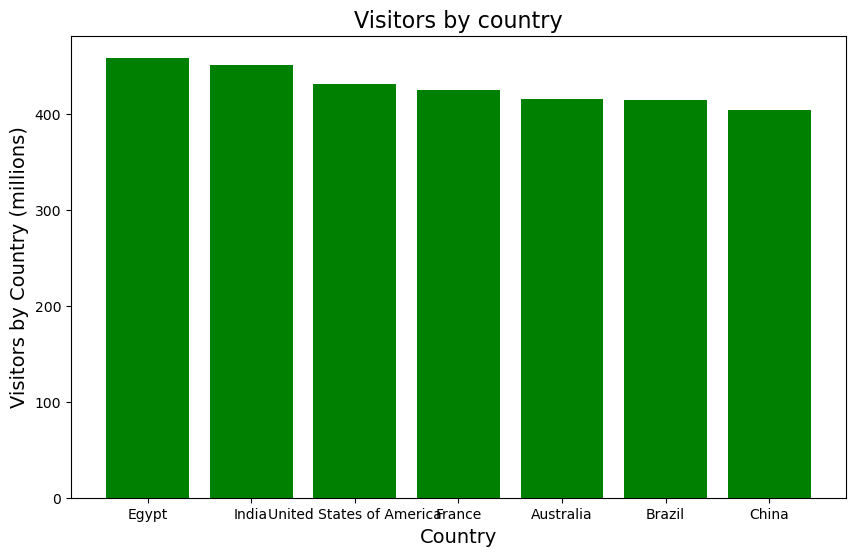

In [181]:
# Plot Visitors by country
plt.figure(figsize=(10,6))
country_visitors_plot = plt.bar(country_visitors_order["Country"], country_visitors_order["Visitors"] / 1000000, color="green")
plt.title(f"Visitors by country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Visitors by Country (millions)", fontsize=14)
plt.yticks(np.arange(0, max(country_visitors_order["Visitors"]) / 1000000 + 1, 100))
#plt.xticks(rotation=45, ha='right')
# Save the figure
plt.savefig("output_data/Visitors_by_country.png")
plt.show()

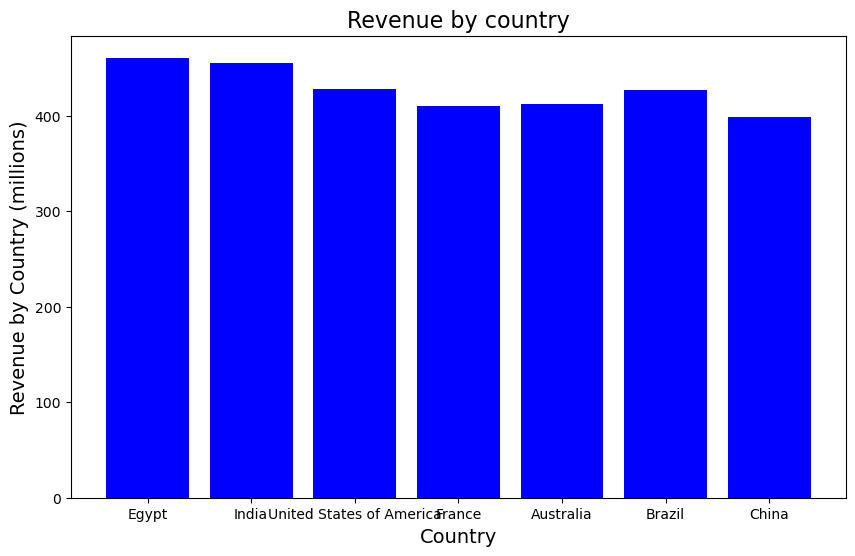

In [182]:
# Plot Revenue by Coutry
plt.figure(figsize=(10,6))
country_visitors_plot = plt.bar(country_visitors_order["Country"], country_visitors_order["Revenue"] / 1000000, color="blue")
plt.title(f"Revenue by country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Revenue by Country (millions)", fontsize=14)
plt.yticks(np.arange(0, max(country_visitors_order["Visitors"]) / 1000000 + 1, 100))
#plt.xticks(rotation=45, ha='right')
# Save the figure
plt.savefig("output_data/Revenue_by_country.png")
plt.show()

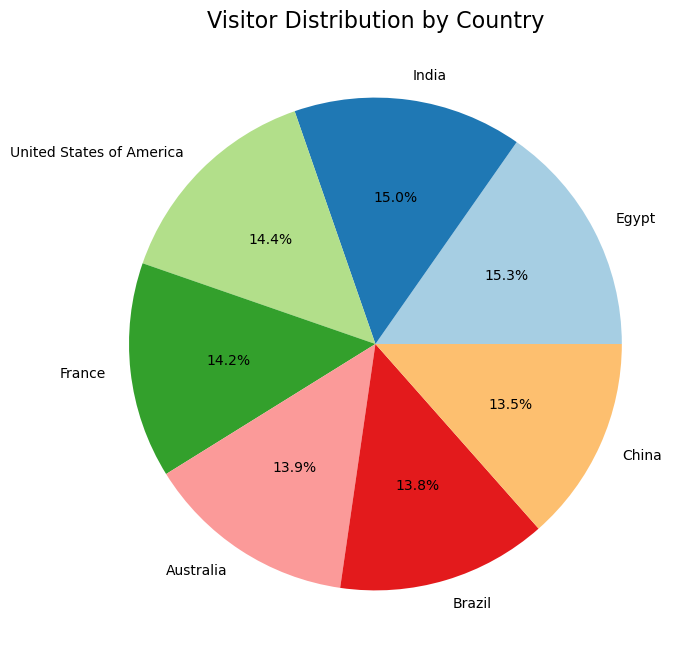

In [183]:
# Pie chart showing the distribution of visitors by Country
plt.figure(figsize=(8,8))
plt.pie(country_visitors_order['Visitors'], labels=country_visitors_order['Country'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Adding title
plt.title('Visitor Distribution by Country', fontsize=16)
# Save the figure
plt.savefig("output_data/Visitors_by_country_pie.png")
# Display the plot
plt.show()

In [190]:
tourism_with_long_lat_selected_columns["Visitors (million)"] = tourism_with_long_lat_selected_columns["Visitors"] / 1000000
tourism_with_long_lat_selected_columns

,Country,Visitors,Revenue,Visitor_average_spending,Country_code,Latitude,Longitude,Visitors (million)
0,Egypt,458573652,4.605948e+08,3019.940355,EGY,26.820553,30.802498,458.573652
1,India,451083005,4.546763e+08,2590.928737,IND,20.593684,78.962880,451.083005
2,United States of America,431204187,4.277053e+08,3091.313189,USA,37.090240,-95.712891,431.204187
3,France,424944621,4.105266e+08,2176.351000,FRA,46.227638,2.213749,424.944621
4,Australia,416038005,4.126633e+08,3237.116104,AUS,-25.274398,133.775136,416.038005
5,Brazil,414293518,4.267832e+08,3684.930425,BRA,-14.235004,-51.925280,414.293518
6,China,404448372,3.984324e+08,3905.323784,CHN,35.861660,104.195397,404.448372


In [202]:
# Configure the map plot
map_plot_country = tourism_with_long_lat_selected_columns.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Visitors (million)",
    color = "Country",
    hover_cols=['Longitude','Latitude','Country','Visitors (million)','Revenue','Visitor_average_spending']
)
# Save the figure
plt.savefig("output_data/Visitors_by_country_pie.png")
# Display the map
map_plot_country

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Visitors (million),Revenue,Visitor_average_spending)

<Figure size 640x480 with 0 Axes>

In [185]:
# top destinations by type
tourism_group_category_df = no_null_tourism_df.groupby("Category")[["Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
# Sort destinations by type
tourism_category_order_df = tourism_group_category_df.sort_values(by="Visitors", ascending=False)
tourism_category_order_df

,Category,Visitors,Revenue,Visitor_average_spending
0,Adventure,528962493,5.021662e+08,3469.823555
5,Urban,515372368,5.119633e+08,3777.120032
3,Historical,495958186,4.846126e+08,3558.714099
2,Cultural,495834336,5.181320e+08,3242.606242
1,Beach,495111800,4.972478e+08,3163.950226
4,Nature,469346177,4.772601e+08,4493.689440


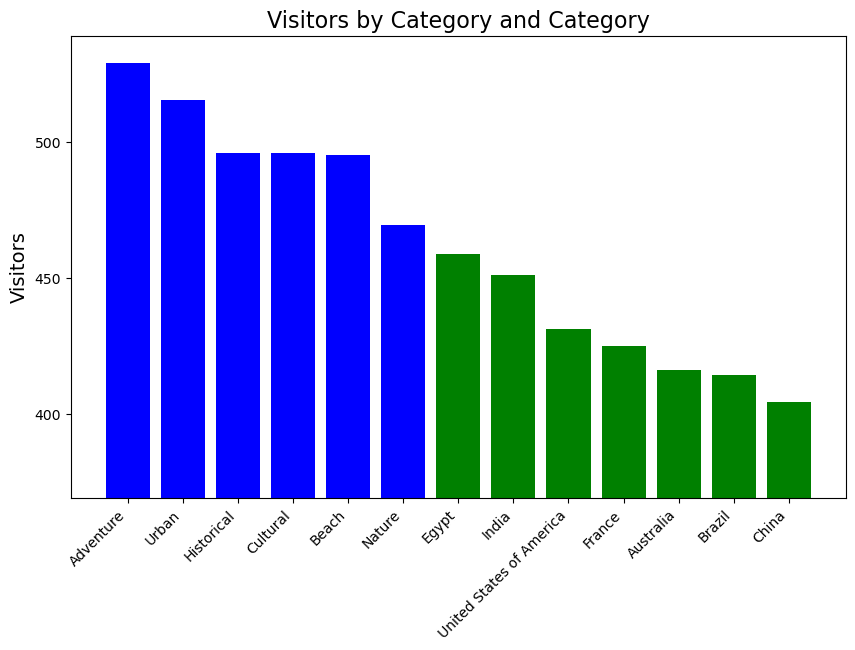

In [186]:
# Plot Visitors by Catergory
plt.figure(figsize=(10,6))
category_visitors_plot = plt.bar(tourism_category_order_df["Category"], tourism_category_order_df["Visitors"] / 1000000, color="blue")
country_visitors_plot = plt.bar(country_visitors_order["Country"], country_visitors_order["Visitors"] / 1000000, color="green")
plt.title(f"Visitors by Category and Category", fontsize=16)
#plt.xlabel("Category", fontsize=14)
plt.ylabel("Visitors", fontsize=14)
plt.yticks(np.arange(0, max(country_visitors_order["Visitors"]) / 1000000 + 50, 50))
plt.xticks(rotation=45, ha='right')
# Set x and y limits
plt.ylim(min(tourism_group_category_df["Visitors"]) / 1000000 - 100, max(tourism_group_category_df["Visitors"]) / 1000000 + 10)
# Save the figure
plt.savefig("output_data/Visitors_by_country_category.png")
plt.show()

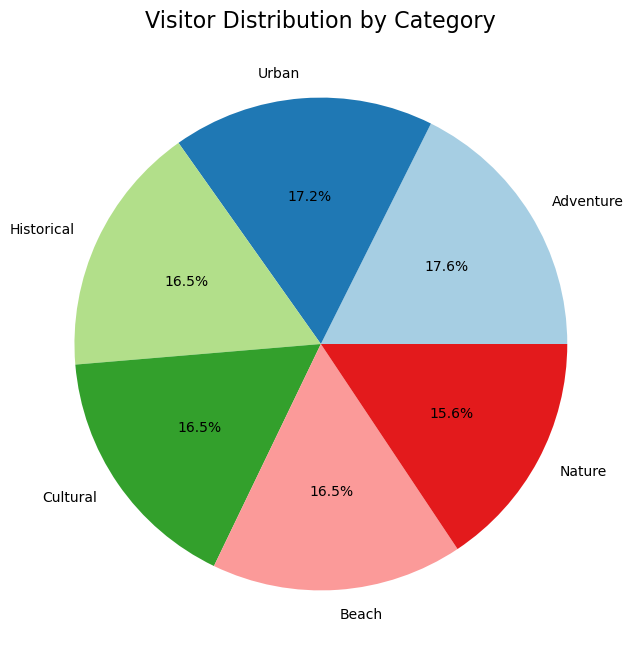

In [187]:
# Pie chart showing the distribution of visitors by category
plt.figure(figsize=(8,8))
plt.pie(tourism_category_order_df['Visitors'], labels=tourism_category_order_df['Category'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Adding title
plt.title('Visitor Distribution by Category', fontsize=16)
# Save the figure
plt.savefig("output_data/Visitors_by_category_pie.png")
# Display the plot
plt.show()

In [188]:
# top 10 locations
tourism_group_location_df = no_null_tourism_df.groupby("Location")[["Country", "Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
tourism_group_location_sorted = tourism_group_location_df.sort_values(by="Visitors", ascending=False)
tourism_group_location_sorted.head(10)


,Location,Country,Visitors,Revenue,Visitor_average_spending
2781,YWZBWoBIzj,China,999982,656615.31,0.656627
5055,rrZdbgEIqB,Egypt,999891,462329.96,0.462380
3726,gcDnKZwQvb,France,999855,157466.43,0.157489
1684,ObvfATdWXD,Australia,999750,184504.30,0.184550
1051,JHduvACsJw,Australia,999664,966022.60,0.966347
3644,fpDjltebSp,USA,999197,843224.00,0.843902
4770,pXxOxFnLVA,Australia,998976,509279.84,0.509802
5490,vnyObMcbQY,USA,998356,53965.42,0.054054
5881,zIlbARMNtv,Brazil,998327,203004.77,0.203345
886,HnUcRjnqcx,India,997922,608390.07,0.609657


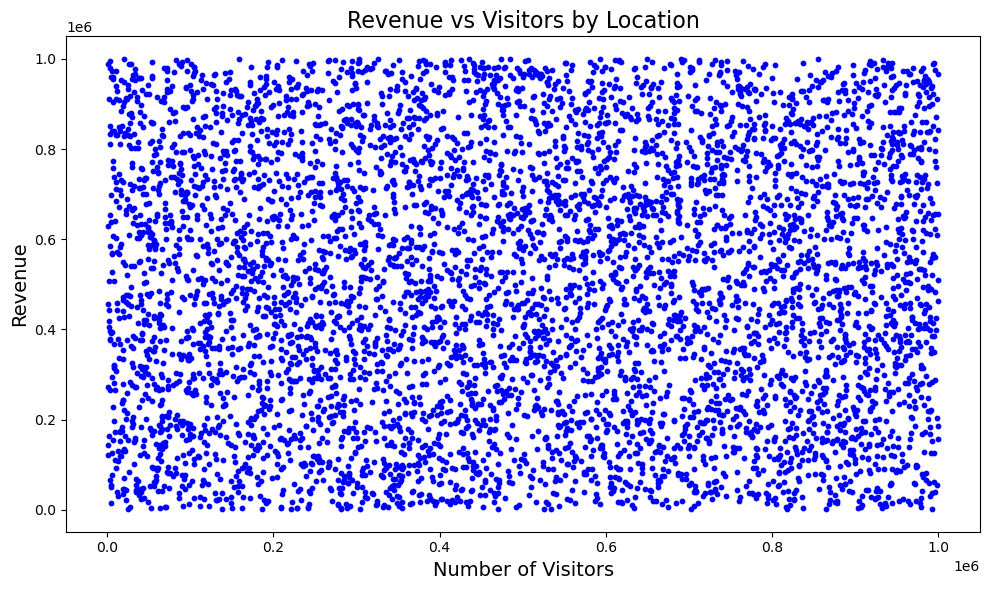

In [189]:
# Scatter plot: Average spending vs Visitors
plt.figure(figsize=(10,6))
plt.scatter(tourism_group_location_sorted['Visitors'], tourism_group_location_sorted['Revenue'], color='blue', s=10)

# Adding labels and title
plt.title('Revenue vs Visitors by Location', fontsize=16)
plt.xlabel('Number of Visitors', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

Popular Destinations: What are the most popular destinations for travelers?

1. From a dataset collecting travel information from 7 major tourist destinations including ['Australia', 'Brazil', 'China', 'Egypt', 'France', 'India', 'USA']
2. Need to check how to track cities from the random string
3. What type of destination will be the most?

Get 1 more dataset: https://wits.worldbank.org/countryprofile/metadata/en/country/all, merge, add 1 more column country code
religion, event, .....

